In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [82]:
df = pd.read_csv('D:/TNC-Demand-Model/Outputs/OTP_Transit_Travel_Times.csv')

In [83]:
df[df['origin'] == 17031980000].travel_time.mean()/60

84.02202508576262

In [84]:
df[df['origin'] == 17031980000].walk_distance.mean()

1249.3789516047332

In [85]:
for year in [2018,2019,2020]:
    print(year)
    for month in [1,2,3,4,5,6,7,8,9,10,11,12]: 
        print(month)
        print(df[(df['YEAR'] == year) & (df['MONTH'] == month)].travel_time.mean())

2018
1
nan
2
nan
3
nan
4
nan
5
nan
6
nan
7
nan
8
nan
9
nan
10
nan
11
4128.330781239454
12
4128.330781239454
2019
1
4128.330781239454
2
4124.097123185559
3
4124.097123185559
4
4124.097123185559
5
4116.858985046589
6
4116.858985046589
7
4116.858985046589
8
4124.553300956269
9
4124.553300956269
10
4124.553300956269
11
4139.031151235995
12
4139.031151235995
2020
1
4139.031151235995
2
4119.531114716803
3
nan
4
nan
5
nan
6
nan
7
nan
8
nan
9
nan
10
nan
11
nan
12
nan


In [86]:
for year in [2018,2019,2020]:
    print(year)
    for month in [1,2,3,4,5,6,7,8,9,10,11,12]: 
        print(month)
        print(len(df[(df['YEAR'] == year) & (df['MONTH'] == month)&(df['origin'] == 17031980000)&(df['TOD'] ==1)]))

2018
1
0
2
0
3
0
4
0
5
0
6
0
7
0
8
0
9
0
10
0
11
0
12
0
2019
1
0
2
0
3
0
4
0
5
0
6
0
7
0
8
0
9
0
10
0
11
0
12
0
2020
1
0
2
0
3
0
4
0
5
0
6
0
7
0
8
0
9
0
10
0
11
0
12
0


In [87]:
df2 = df[['MONTH','TOD','travel_time','walk_distance','YEAR']].groupby(by = ['YEAR','MONTH','TOD'], as_index = False).mean()

In [88]:
df3 = df[['MONTH','TOD','travel_time','walk_distance','YEAR','origin']].groupby(by = ['YEAR','MONTH','origin'], as_index = False).mean()

In [89]:
df2.head(50)

,YEAR,MONTH,TOD,travel_time,walk_distance
0,2018,11,5,4128.330781,1134.579160
1,2018,12,5,4128.330781,1134.579160
2,2019,1,5,4128.330781,1134.579160
3,2019,2,5,4124.097123,1133.074926
4,2019,3,5,4124.097123,1133.074926
5,2019,4,5,4124.097123,1133.074926
6,2019,5,5,4116.858985,1132.737172
7,2019,6,5,4116.858985,1132.737172
8,2019,7,5,4116.858985,1132.737172
9,2019,8,5,4124.553301,1136.986587


In [90]:
df3[df3['origin'] == 17031010100]

,YEAR,MONTH,origin,TOD,travel_time,walk_distance
0,2018,11,17031010100,5,4586.729830,1054.564062
801,2018,12,17031010100,5,4586.729830,1054.564062
1602,2019,1,17031010100,5,4586.729830,1054.564062
2403,2019,2,17031010100,5,4637.097545,1051.476529
3204,2019,3,17031010100,5,4637.097545,1051.476529
4005,2019,4,17031010100,5,4637.097545,1051.476529
4806,2019,5,17031010100,5,4627.884988,1089.359405
5607,2019,6,17031010100,5,4627.884988,1089.359405
6408,2019,7,17031010100,5,4627.884988,1089.359405
7209,2019,8,17031010100,5,4588.383925,1100.666518


In [91]:
df[(df['origin'] == 17031980000)&(df['destination'] == 17031010100)&(df['TOD'] == 1)]

,Unnamed: 0,origin,destination,TOD,year,walk_distance,travel_time,MONTH,YEAR


In [92]:
df[df['YEAR'] == 2020]

,Unnamed: 0,origin,destination,TOD,year,walk_distance,travel_time,MONTH,YEAR
8982414,0,17031010100,17031010100,5,20191204.0,46.000000,34.000000,1,2020
8982415,1,17031010100,17031010201,5,20191204.0,1445.381383,1136.000000,1,2020
8982416,2,17031010100,17031010202,5,20191204.0,806.149782,626.000000,1,2020
8982417,3,17031010100,17031010300,5,20191204.0,841.572052,710.932630,1,2020
8982418,4,17031010100,17031010400,5,20191204.0,594.274611,1714.406390,1,2020
...,...,...,...,...,...,...,...,...,...
10265611,641596,17031980100,17031843700,5,20200205.0,1999.289779,5549.237554,2,2020
10265612,641597,17031980100,17031843800,5,20200205.0,1968.354918,3632.007804,2,2020
10265613,641598,17031980100,17031843900,5,20200205.0,2301.030497,4711.339832,2,2020
10265614,641599,17031980100,17031980000,5,20200205.0,2183.324715,6448.587687,2,2020


In [93]:
df[(df['MONTH'] == 6)&(df['origin'] == 17031980000)]

,Unnamed: 0,origin,destination,TOD,year,walk_distance,travel_time,MONTH,YEAR
5131206,639999,17031980000,17031010100,5,20190605.0,1494.663786,5781.390425,6,2019
5131207,640000,17031980000,17031010201,5,20190605.0,1619.976534,5597.925212,6,2019
5131208,640001,17031980000,17031010202,5,20190605.0,1295.470312,5348.179550,6,2019
5131209,640002,17031980000,17031010300,5,20190605.0,1195.739600,5874.811973,6,2019
5131210,640003,17031980000,17031010400,5,20190605.0,1282.529249,6180.938882,6,2019
...,...,...,...,...,...,...,...,...,...
5132002,640795,17031980000,17031843700,5,20190605.0,1231.902968,3690.611019,6,2019
5132003,640796,17031980000,17031843800,5,20190605.0,1043.731959,5786.266987,6,2019
5132004,640797,17031980000,17031843900,5,20190605.0,1253.307872,5515.771378,6,2019
5132005,640798,17031980000,17031980000,5,20190605.0,48.000000,36.000000,6,2019


In [94]:
df[(df['origin'] == 17031010100)&(df['destination'] == 17031010201)&(df['MONTH'] == 11)]

,Unnamed: 0,origin,destination,TOD,year,walk_distance,travel_time,MONTH,YEAR
1,1,17031010100,17031010201,5,20181205.0,1417.092220,1120.894108,11,2018
7699213,1,17031010100,17031010201,5,20191204.0,1445.381383,1136.000000,11,2019


In [95]:
len(df[df['origin'] == 17031010100])

12816

In [96]:
long_walk = df[df['walk_distance'] > 15000]

In [97]:
long_walk.origin.value_counts()

Series([], Name: origin, dtype: int64)

In [98]:
long_walk.destination.value_counts()

Series([], Name: destination, dtype: int64)

In [99]:
long_tt = df[df['travel_time'] > 18000]

In [100]:
long_tt.origin.value_counts()

Series([], Name: origin, dtype: int64)

In [101]:
df_daily = df.groupby(by = ['origin','destination'], as_index = False).mean()

In [102]:
car_otp = pd.read_csv('D:/TNC-Demand-Model/Outputs/OTP Travel Times/Car/20190206/traveltime_matrix_18-6.csv')

In [103]:
df[df['travel_time']>28000]

,Unnamed: 0,origin,destination,TOD,year,walk_distance,travel_time,MONTH,YEAR


In [104]:
df_daily[(df_daily['origin'] == 17031980000)&(df_daily['travel_time'] >15000)]

,origin,destination,Unnamed: 0,TOD,year,walk_distance,travel_time,MONTH,YEAR


In [105]:
otp = df_daily.merge(car_otp, on = ['origin','destination'], suffixes = ('_AUTO','_TRANSIT'))

In [106]:
otp.head()

,origin,destination,Unnamed: 0,TOD,year_AUTO,walk_distance_AUTO,travel_time_AUTO,MONTH,YEAR,year_TRANSIT,depart_time,walk_distance_TRANSIT,travel_time_TRANSIT
0,17031010100,17031010100,0.0,5.0,2.018954e+07,46.000000,34.000000,6.5,2019.0,2019011,18:6:00,48.0,36
1,17031010100,17031010201,1.0,5.0,2.018954e+07,1420.940133,1124.751250,6.5,2019.0,2019011,18:6:00,52.0,387
2,17031010100,17031010202,2.0,5.0,2.018954e+07,806.149782,626.000000,6.5,2019.0,2019011,18:6:00,58.0,217
3,17031010100,17031010300,3.0,5.0,2.018954e+07,823.396214,710.537522,6.5,2019.0,2019011,18:6:00,81.0,220
4,17031010100,17031010400,4.0,5.0,2.018954e+07,594.985059,1608.392634,6.5,2019.0,2019011,18:6:00,NaN,593


In [218]:
est = pd.read_csv('D:/TNC-Demand-Model/Outputs/Chi_Estimation_File.csv', usecols = ['YEAR','MONTH','travel_time','Trip Seconds_SHARED', 'Trip Seconds_PRIVATE', 'ORIGIN','DESTINATION'])

In [109]:
car_otp.travel_time.mean()/60

40.67706370196583

In [220]:
est.columns

Index(['YEAR', 'MONTH', 'ORIGIN', 'DESTINATION', 'Trip Seconds_SHARED',
       'Trip Seconds_PRIVATE', 'travel_time'],
      dtype='object')

In [221]:
est_od = est[['ORIGIN','DESTINATION','MONTH','YEAR','travel_time','Trip Seconds_SHARED', 'Trip Seconds_PRIVATE']].groupby(by = ['ORIGIN','DESTINATION','MONTH','YEAR'], as_index = False).mean()

In [222]:
graph_df = est_od.merge(car_otp, how = 'left', left_on = ['ORIGIN','DESTINATION'], right_on = ['origin','destination'],suffixes = ('_TRANSIT','_AUTO'))

In [228]:
graph_df['RH_PRIVATE_TRAVEL_TIME'] = graph_df['Trip Seconds_PRIVATE']/60
graph_df['RH_SHARED_TRAVEL_TIME'] = graph_df['Trip Seconds_SHARED']/60

graph_df['TRANSIT_TRAVEL_TIME'] = graph_df['travel_time_TRANSIT']/60
graph_df['AUTO_TRAVEL_TIME'] = graph_df['travel_time_AUTO']/60

In [229]:
graph_df.RH_PRIVATE_TRAVEL_TIME.mean()

20.58446816220825

In [230]:
graph_df.RH_SHARED_TRAVEL_TIME.mean()

24.216259300876914

In [226]:
graph_df.AUTO_TRAVEL_TIME.mean()

30.403398807842752

In [ ]:
graph_df['AUTO_RH_SHARED_TT_DIFF'] = graph_df['AUTO_TRAVEL_TIME'] - graph_df['RH_SHARED_TRAVEL_TIME']

In [257]:
graph_df['AUTO_RH_SHARED_TT_DIFF'].min()

-107.13333333333333

In [258]:
graph_df[graph_df['AUTO_RH_SHARED_TT_DIFF'] < -90]

,ORIGIN,DESTINATION,MONTH,YEAR,travel_time_TRANSIT,Trip Seconds_SHARED,Trip Seconds_PRIVATE,year,depart_time,origin,destination,walk_distance,travel_time_AUTO,RH_PRIVATE_TRAVEL_TIME,RH_SHARED_TRAVEL_TIME,TRANSIT_TRAVEL_TIME,AUTO_TRAVEL_TIME,AUTO_RH_PRIVATE_TT_DIFF,AUTO_RH_SHARED_TT_DIFF
77267,1.703101e+10,1.703102e+10,2,2020,1649.793857,7021.0,563.888889,2019011.0,18:6:00,1.703101e+10,1.703102e+10,67.0,593.0,9.398148,117.016667,27.496564,9.883333,0.485185,-107.133333
852009,1.703105e+10,1.703131e+10,8,2019,3574.167462,7140.0,1672.250000,2019011.0,18:6:00,1.703105e+10,1.703131e+10,52.0,1707.0,27.870833,119.000000,59.569458,28.450000,0.579167,-90.550000
889972,1.703105e+10,1.703128e+10,3,2019,2940.153607,6852.0,NaN,2019011.0,18:6:00,1.703105e+10,1.703128e+10,26.0,1356.0,NaN,114.200000,49.002560,22.600000,NaN,-91.600000
3708368,1.703124e+10,1.703124e+10,1,2019,463.000000,6340.0,198.000000,2019011.0,18:6:00,1.703124e+10,1.703124e+10,2.0,135.0,3.300000,105.666667,7.716667,2.250000,-1.050000,-103.416667
3926600,1.703124e+10,1.703124e+10,7,2019,4.000000,5918.0,368.227196,2019011.0,18:6:00,1.703124e+10,1.703124e+10,6.0,4.0,6.137120,98.633333,0.066667,0.066667,-6.070453,-98.566667
4573557,1.703128e+10,1.703183e+10,4,2019,3632.726821,7075.0,1579.000000,2019011.0,18:6:00,1.703128e+10,1.703183e+10,108.0,1545.0,26.316667,117.916667,60.545447,25.750000,-0.566667,-92.166667
5225699,1.703138e+10,1.703167e+10,2,2020,2099.641328,7033.0,NaN,2019011.0,18:6:00,1.703138e+10,1.703167e+10,89.0,1036.0,NaN,117.216667,34.994022,17.266667,NaN,-99.950000
6702482,1.703156e+10,1.703184e+10,2,2019,4228.381169,6985.0,NaN,2019011.0,18:6:00,1.703156e+10,1.703184e+10,70.0,1446.0,NaN,116.416667,70.473019,24.100000,NaN,-92.316667
6978257,1.703160e+10,1.703135e+10,1,2020,2929.990164,6631.0,626.000000,2019011.0,18:6:00,1.703160e+10,1.703135e+10,NaN,788.0,10.433333,110.516667,48.833169,13.133333,2.700000,-97.383333
7315190,1.703163e+10,1.703169e+10,5,2019,3271.444393,7018.0,NaN,2019011.0,18:6:00,1.703163e+10,1.703169e+10,17.0,1504.0,NaN,116.966667,54.524073,25.066667,NaN,-91.900000


In [259]:
graph_df[graph_df['AUTO_RH_SHARED_TT_DIFF'] < -90].origin.astype(str)

77267      17031010502.0
852009     17031050500.0
889972     17031050800.0
3708368    17031241100.0
3926600    17031243100.0
4573557    17031283100.0
5225699    17031381400.0
6702482    17031560700.0
6978257    17031600400.0
7315190    17031630400.0
9240057    17031834500.0
9871374    17031841000.0
Name: origin, dtype: object

In [260]:
graph_df[graph_df['AUTO_RH_SHARED_TT_DIFF'] < -90].destination.astype(str)

77267      17031020901.0
852009     17031310800.0
889972     17031282700.0
3708368    17031240600.0
3926600    17031243100.0
4573557    17031830700.0
5225699    17031670300.0
6702482    17031842300.0
6978257    17031351000.0
7315190    17031691200.0
9240057    17031842300.0
9871374    17031160100.0
Name: destination, dtype: object

In [261]:
graph_df['AUTO_RH_SHARED_TT_DIFF'].max()

47.9

In [262]:
graph_df[graph_df['AUTO_RH_SHARED_TT_DIFF'] > 30]

,ORIGIN,DESTINATION,MONTH,YEAR,travel_time_TRANSIT,Trip Seconds_SHARED,Trip Seconds_PRIVATE,year,depart_time,origin,destination,walk_distance,travel_time_AUTO,RH_PRIVATE_TRAVEL_TIME,RH_SHARED_TRAVEL_TIME,TRANSIT_TRAVEL_TIME,AUTO_TRAVEL_TIME,AUTO_RH_PRIVATE_TT_DIFF,AUTO_RH_SHARED_TT_DIFF
375970,1.703103e+10,1.703123e+10,2,2019,3899.098407,23.0,NaN,2019011.0,18:6:00,1.703103e+10,1.703123e+10,27.0,2361.0,NaN,0.383333,64.984973,39.350000,NaN,38.966667
2448256,1.703116e+10,1.703103e+10,1,2019,3819.167484,8.0,NaN,2019011.0,18:6:00,1.703116e+10,1.703103e+10,149.0,1940.0,NaN,0.133333,63.652791,32.333333,NaN,32.200000
3995122,1.703125e+10,1.703165e+10,2,2019,5339.580851,1722.0,NaN,2019011.0,18:6:00,1.703125e+10,1.703165e+10,88.0,3567.0,NaN,28.700000,88.993014,59.450000,NaN,30.750000
5979952,1.703146e+10,1.703149e+10,1,2019,3458.744285,10.0,NaN,2019011.0,18:6:00,1.703146e+10,1.703149e+10,416.0,1981.0,NaN,0.166667,57.645738,33.016667,NaN,32.850000
7521364,1.703165e+10,1.703183e+10,3,2019,6430.004264,939.0,NaN,2019011.0,18:6:00,1.703165e+10,1.703183e+10,45.0,3813.0,NaN,15.650000,107.166738,63.550000,NaN,47.900000
7630641,1.703166e+10,1.703125e+10,1,2020,4728.876545,1656.0,NaN,2019011.0,18:6:00,1.703166e+10,1.703125e+10,100.0,3492.0,NaN,27.600000,78.814609,58.200000,NaN,30.600000
10099668,1.703184e+10,1.703103e+10,3,2019,4187.583379,5.0,2762.0,2019011.0,18:6:00,1.703184e+10,1.703103e+10,133.0,2032.0,46.033333,0.083333,69.793056,33.866667,-12.166667,33.783333
10107246,1.703184e+10,1.703154e+10,12,2018,6424.437094,291.0,NaN,2019011.0,18:6:00,1.703184e+10,1.703154e+10,250.0,2281.0,NaN,4.850000,107.073952,38.016667,NaN,33.166667
10246242,1.703198e+10,1.703134e+10,2,2019,5236.158458,4.0,2228.5,2019011.0,18:6:00,1.703198e+10,1.703134e+10,71.0,1860.0,37.141667,0.066667,87.269308,31.000000,-6.141667,30.933333


In [263]:
graph_df[graph_df['AUTO_RH_SHARED_TT_DIFF'] > 30].origin.astype(str)

375970      17031030200.0
2448256     17031160200.0
3995122     17031250200.0
5979952     17031460100.0
7521364     17031650500.0
7630641     17031661000.0
10099668    17031842900.0
10107246    17031842900.0
10246242    17031980000.0
Name: origin, dtype: object

In [264]:
graph_df[graph_df['AUTO_RH_SHARED_TT_DIFF'] > 30].destination.astype(str)

375970      17031230100.0
2448256     17031030101.0
3995122     17031650302.0
5979952     17031490300.0
7521364     17031831500.0
7630641     17031251200.0
10099668    17031030900.0
10107246    17031540101.0
10246242    17031340300.0
Name: destination, dtype: object

In [233]:
graph_df['AUTO_RH_PRIVATE_TT_DIFF'] = graph_df['AUTO_TRAVEL_TIME'] - graph_df['RH_PRIVATE_TRAVEL_TIME']

In [234]:
graph_df['AUTO_RH_PRIVATE_TT_DIFF'].min()

-101.73333333333333

In [235]:
graph_df[graph_df['AUTO_RH_PRIVATE_TT_DIFF'] < -90]

,ORIGIN,DESTINATION,MONTH,YEAR,travel_time_TRANSIT,Trip Seconds_SHARED,Trip Seconds_PRIVATE,year,depart_time,origin,destination,walk_distance,travel_time_AUTO,RH_PRIVATE_TRAVEL_TIME,RH_SHARED_TRAVEL_TIME,TRANSIT_TRAVEL_TIME,AUTO_TRAVEL_TIME,AUTO_RH_PRIVATE_TT_DIFF
285150,1.703102e+10,1.703116e+10,12,2018,2444.769766,1214.583333,6840.0,2019011.0,18:6:00,1.703102e+10,1.703116e+10,2.0,1169.0,114.000000,20.243056,40.746163,19.483333,-94.516667
1469558,1.703107e+10,1.703158e+10,5,2019,4101.107852,NaN,7081.0,2019011.0,18:6:00,1.703107e+10,1.703158e+10,74.0,1423.0,118.016667,NaN,68.351798,23.716667,-94.300000
1614870,1.703108e+10,1.703101e+10,5,2019,3009.782455,1746.750000,7162.0,2019011.0,18:6:00,1.703108e+10,1.703101e+10,70.0,1608.0,119.366667,29.112500,50.163041,26.800000,-92.566667
2976894,1.703119e+10,1.703119e+10,12,2018,653.000000,177.000000,6270.0,2019011.0,18:6:00,1.703119e+10,1.703119e+10,36.0,166.0,104.500000,2.950000,10.883333,2.766667,-101.733333
5121908,1.703135e+10,1.703156e+10,3,2019,3836.924638,NaN,6771.0,2019011.0,18:6:00,1.703135e+10,1.703156e+10,11.0,1164.0,112.850000,NaN,63.948744,19.400000,-93.450000
5543649,1.703141e+10,1.703143e+10,1,2020,2046.408242,533.000000,6202.0,2019011.0,18:6:00,1.703141e+10,1.703143e+10,67.0,784.0,103.366667,8.883333,34.106804,13.066667,-90.300000
7558057,1.703166e+10,1.703166e+10,8,2019,6.000000,NaN,5957.0,2019011.0,18:6:00,1.703166e+10,1.703166e+10,10.0,6.0,99.283333,NaN,0.100000,0.100000,-99.183333
9109420,1.703183e+10,1.703169e+10,11,2018,3174.212450,NaN,7060.0,2019011.0,18:6:00,1.703183e+10,1.703169e+10,88.0,1460.0,117.666667,NaN,52.903541,24.333333,-93.333333
9606349,1.703184e+10,1.703143e+10,11,2019,3559.408253,NaN,6970.0,2019011.0,18:6:00,1.703184e+10,1.703143e+10,52.0,1561.0,116.166667,NaN,59.323471,26.016667,-90.150000
9636338,1.703184e+10,1.703183e+10,2,2019,3122.806943,NaN,7111.0,2019011.0,18:6:00,1.703184e+10,1.703183e+10,35.0,1464.0,118.516667,NaN,52.046782,24.400000,-94.116667


In [236]:
graph_df[graph_df['AUTO_RH_PRIVATE_TT_DIFF'] < -90].origin.astype(str)

285150     17031020802.0
1469558    17031070600.0
1614870    17031080201.0
2976894    17031191302.0
5121908    17031351400.0
5543649    17031411200.0
7558057    17031660400.0
9109420    17031832600.0
9606349    17031838100.0
9636338    17031838300.0
Name: origin, dtype: object

In [237]:
graph_df[graph_df['AUTO_RH_PRIVATE_TT_DIFF'] < -90].destination.astype(str)

285150     17031160800.0
1469558    17031580200.0
1614870    17031010300.0
2976894    17031190602.0
5121908    17031560300.0
5543649    17031430400.0
7558057    17031660400.0
9109420    17031691100.0
9606349    17031430500.0
9636338    17031834500.0
Name: destination, dtype: object

In [238]:
graph_df['AUTO_RH_PRIVATE_TT_DIFF'].max()

43.36666666666667

In [245]:
graph_df[graph_df['AUTO_RH_PRIVATE_TT_DIFF'] > 30].origin.astype(str)

1054441    17031060900.0
1432020    17031070300.0
1534386    17031071300.0
2405748    17031151002.0
4213844    17031252000.0
6138930    17031480400.0
7585471    17031660600.0
7638031    17031661000.0
7676788    17031670300.0
8129009    17031700200.0
8132806    17031700200.0
8169039    17031700401.0
8175996    17031700401.0
8180330    17031700402.0
8184065    17031700402.0
8741351    17031760802.0
Name: origin, dtype: object

In [244]:
graph_df[graph_df['AUTO_RH_PRIVATE_TT_DIFF'] > 30].destination.astype(str)

1054441    17031190401.0
1432020    17031660500.0
1534386    17031640800.0
2405748    17031630800.0
4213844    17031700401.0
6138930    17031010400.0
7585471    17031831600.0
7638031    17031842100.0
7676788    17031010100.0
8129009    17031191100.0
8132806    17031460100.0
8169039    17031251900.0
8175996    17031839900.0
8180330    17031191302.0
8184065    17031460100.0
8741351    17031032100.0
Name: destination, dtype: object

In [243]:
graph_df[graph_df['AUTO_RH_PRIVATE_TT_DIFF'] > 30]

,ORIGIN,DESTINATION,MONTH,YEAR,travel_time_TRANSIT,Trip Seconds_SHARED,Trip Seconds_PRIVATE,year,depart_time,origin,destination,walk_distance,travel_time_AUTO,RH_PRIVATE_TRAVEL_TIME,RH_SHARED_TRAVEL_TIME,TRANSIT_TRAVEL_TIME,AUTO_TRAVEL_TIME,AUTO_RH_PRIVATE_TT_DIFF
1054441,1.703106e+10,1.703119e+10,8,2019,4484.741868,NaN,908.0,2019011.0,18:6:00,1.703106e+10,1.703119e+10,83.0,2925.0,15.133333,NaN,74.745698,48.750000,33.616667
1432020,1.703107e+10,1.703166e+10,3,2019,4788.323429,NaN,947.0,2019011.0,18:6:00,1.703107e+10,1.703166e+10,4.0,2804.0,15.783333,NaN,79.805390,46.733333,30.950000
1534386,1.703107e+10,1.703164e+10,2,2019,4589.271865,NaN,389.0,2019011.0,18:6:00,1.703107e+10,1.703164e+10,15.0,2446.0,6.483333,NaN,76.487864,40.766667,34.283333
2405748,1.703115e+10,1.703163e+10,3,2019,5373.677745,NaN,678.0,2019011.0,18:6:00,1.703115e+10,1.703163e+10,15.0,2711.0,11.300000,NaN,89.561296,45.183333,33.883333
4213844,1.703125e+10,1.703170e+10,3,2019,5712.598203,NaN,1807.0,2019011.0,18:6:00,1.703125e+10,1.703170e+10,66.0,3692.0,30.116667,NaN,95.209970,61.533333,31.416667
6138930,1.703148e+10,1.703101e+10,2,2019,5784.791170,NaN,986.0,2019011.0,18:6:00,1.703148e+10,1.703101e+10,NaN,3031.0,16.433333,NaN,96.413186,50.516667,34.083333
7585471,1.703166e+10,1.703183e+10,12,2019,5787.098032,NaN,2120.0,2019011.0,18:6:00,1.703166e+10,1.703183e+10,26.0,3984.0,35.333333,NaN,96.451634,66.400000,31.066667
7638031,1.703166e+10,1.703184e+10,12,2019,4090.966585,NaN,1490.0,2019011.0,18:6:00,1.703166e+10,1.703184e+10,99.0,3353.0,24.833333,NaN,68.182776,55.883333,31.050000
7676788,1.703167e+10,1.703101e+10,3,2019,5286.769479,NaN,463.0,2019011.0,18:6:00,1.703167e+10,1.703101e+10,73.0,3065.0,7.716667,NaN,88.112825,51.083333,43.366667
8129009,1.703170e+10,1.703119e+10,1,2020,5507.218611,NaN,2284.0,2019011.0,18:6:00,1.703170e+10,1.703119e+10,152.0,4169.0,38.066667,NaN,91.786977,69.483333,31.416667


<AxesSubplot:xlabel='RH_PRIVATE_TRAVEL_TIME', ylabel='RH_SHARED_TRAVEL_TIME'>

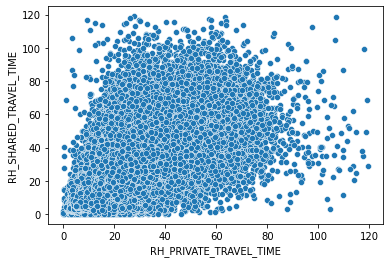

In [247]:
sns.scatterplot(x=graph_df['RH_PRIVATE_TRAVEL_TIME'], y=graph_df['RH_SHARED_TRAVEL_TIME'])

(0.0, 120.0)

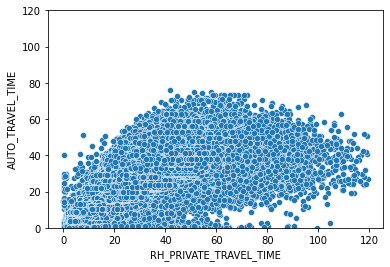

In [249]:
sns.scatterplot(x=graph_df['RH_PRIVATE_TRAVEL_TIME'], y=graph_df['AUTO_TRAVEL_TIME'])
plt.ylim(0, 120)

In [250]:
graph_df[graph_df['RH_PRIVATE_TRAVEL_TIME'] == 0]

,ORIGIN,DESTINATION,MONTH,YEAR,travel_time_TRANSIT,Trip Seconds_SHARED,Trip Seconds_PRIVATE,year,depart_time,origin,destination,walk_distance,travel_time_AUTO,RH_PRIVATE_TRAVEL_TIME,RH_SHARED_TRAVEL_TIME,TRANSIT_TRAVEL_TIME,AUTO_TRAVEL_TIME,AUTO_RH_PRIVATE_TT_DIFF
5416107,1.703140e+10,1.703149e+10,10,2019,2605.266494,NaN,0.0,2019011.0,18:6:00,1.703140e+10,1.703149e+10,70.0,883.0,0.0,NaN,43.421108,14.716667,14.716667


In [251]:
graph_df[graph_df['RH_PRIVATE_TRAVEL_TIME'] == 0].ORIGIN.astype(str)

5416107    17031400800.0
Name: ORIGIN, dtype: object

In [252]:
graph_df[graph_df['RH_PRIVATE_TRAVEL_TIME'] == 0].DESTINATION.astype(str)

5416107    17031490600.0
Name: DESTINATION, dtype: object

(0.0, 200.0)

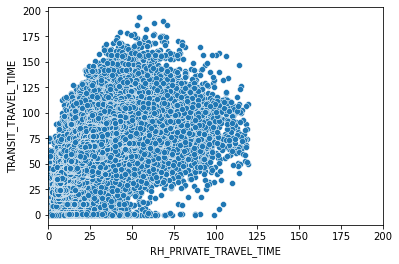

In [253]:
sns.scatterplot(x=graph_df['RH_PRIVATE_TRAVEL_TIME'], y=graph_df['TRANSIT_TRAVEL_TIME'])
plt.xlim(0, 200)

(0.0, 250.0)

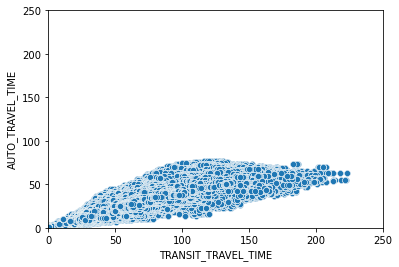

In [254]:
sns.scatterplot(x=graph_df['TRANSIT_TRAVEL_TIME'],y= graph_df['AUTO_TRAVEL_TIME'])
plt.xlim(0, 250)
plt.ylim(0, 250)

<AxesSubplot:xlabel='RH_TRAVEL_TIME', ylabel='AUTO_TRAVEL_TIME'>

C:\Users\transportlab\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


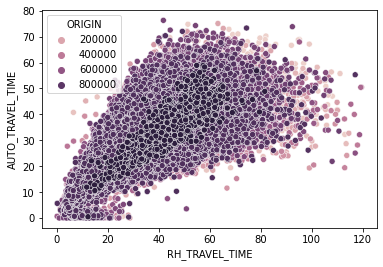

In [63]:
sns.scatterplot(x=graph_df2['RH_TRAVEL_TIME'],y=graph_df2['AUTO_TRAVEL_TIME'], hue = graph_df2['ORIGIN'])

In [143]:
graph_df.head()

,ORIGIN,DESTINATION,travel_time_TRANSIT,Trip Seconds,year,depart_time,origin,destination,walk_distance,travel_time_AUTO,RH_TRAVEL_TIME,TRANSIT_TRAVEL_TIME,AUTO_TRAVEL_TIME,AUTO_RH_TT_DIFF
0,1.703101e+10,1.703101e+10,34.000000,716.912648,2019011.0,18:6:00,1.703101e+10,1.703101e+10,48.0,36.0,11.948544,0.566667,0.600000,-11.348544
1,1.703101e+10,1.703101e+10,1124.751250,333.935266,2019011.0,18:6:00,1.703101e+10,1.703101e+10,52.0,387.0,5.565588,18.745854,6.450000,0.884412
2,1.703101e+10,1.703101e+10,626.000000,294.971227,2019011.0,18:6:00,1.703101e+10,1.703101e+10,58.0,217.0,4.916187,10.433333,3.616667,-1.299520
3,1.703101e+10,1.703101e+10,710.537522,264.953499,2019011.0,18:6:00,1.703101e+10,1.703101e+10,81.0,220.0,4.415892,11.842292,3.666667,-0.749225
4,1.703101e+10,1.703101e+10,1608.392634,395.505174,2019011.0,18:6:00,1.703101e+10,1.703101e+10,NaN,593.0,6.591753,26.806544,9.883333,3.291580


In [ ]:
rh = pd.read_csv('D:/TNC-Demand-Model/Outputs/2019_Weekday_Monthly_Ridehail_TOD.csv')

In [ ]:
rh[(rh['ORIGIN'] ==  17031010201) and (rh['DESTINATION'] == 17031700302)]

In [146]:
np.sqrt(np.mean((graph_df['AUTO_RH_TT_DIFF']/graph_df['RH_TRAVEL_TIME'])**2))

0.24836803467403198

In [142]:
np.sqrt(np.sum(graph_df['AUTO_RH_TT_DIFF']**2)/len(graph_df))

7.240593731394618

In [ ]:
census = gp.read_file('C:/Workspace/TNC-Demand-Model/Inputs/Census Shapefiles/Tracts/tl_2019_17_tract/tl_2019_17_tract.shp')

In [ ]:
census['GEOID'] = census['GEOID'].astype(float)

In [ ]:
points = rh['Pickup Census Tract'].append(rh['Dropoff Census Tract'])

points = points.drop_duplicates()

In [ ]:
rh_origin = census[census['GEOID'].isin(points)]

In [60]:
rh_origin = rh_origin.drop_duplicates(subset = 'GEOID')

In [61]:
rh_origin.to_file('Ride-Hailing Origins.shp', driver = 'ESRI Shapefile')

In [62]:
len(rh_origin)

1023

In [36]:
df['origin'] = df['origin'].astype(str)
df['destination'] = df['destination'].astype(str)

In [24]:
origin = pd.merge(census, df, how = 'inner', left_on = 'GEOID', right_on = 'origin')

In [31]:
origin = origin.drop_duplicates?

In [32]:
origin = origin.drop_duplicates(subset = 'origin')

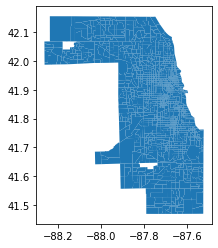

In [33]:
origin.plot()

In [34]:
origin.to_file('Origin_Tract_Travel_Times.shp', driver = 'ESRI Shapefile')

In [37]:
dest = pd.merge(census, df, how = 'inner', left_on = 'GEOID', right_on = 'destination')

In [38]:
dest.to_file('Destination_Tract_Travel_Times.shp', driver = 'ESRI Shapefile')